In [81]:
import requests
import pandas as pd
from IPython.display import display, HTML
import sys
from StringIO import StringIO
import time
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

## Grab High Confidence C2 Domain Feed

In [2]:
r = requests.get('http://osint.bambenekconsulting.com/feeds/c2-dommasterlist-high.txt')

In [10]:
raw_response = r.text.split('\n')

In [36]:
# Fix the text and ignore the comments lines
fixed_response = []
for line in raw_response:
    li=line.strip()
    if not li.startswith("#"):
        fixed_response.append(li.rstrip())

In [42]:
# array to multiline string to make a valid CSV
f2 = """
{}
""".format("\n".join(fixed_response))

In [49]:
# create a StringIO object to be able to read_csv into dataframe
df = pd.read_csv(StringIO(f2), header=None, names=['domain', 'comment', 'date', 'source'])

## Function to enrich feed data

In [107]:
def d(d):
    r = requests.get('http://ip-api.com/json/%s' %d).json()
    if 'countryCode' in r:
        c = r['countryCode']
    else:
        c = None    
    if 'as' in r:
        a = r['as']
    else:
        a = None
    time.sleep(1) # 3 second delay due to API limitations
    return (c, a)

In [105]:
df['ip_api'] = df['domain'].apply(lambda x: d(x))

In [110]:
df['cc'] = df['ip_api'].apply(lambda x: x[0])
df['as'] = df['ip_api'].apply(lambda x: x[1])

## Group By Country Code

cc
US    132
DE     17
VG      6
RU      5
FR      2
CN      2
AU      2
UA      1
TW      1
KR      1
CZ      1
CH      1
BR      1
Name: domain, dtype: int64


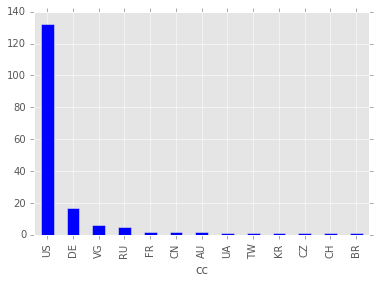

In [111]:
gb1 = df.groupby('cc')['domain'].count().sort_values(ascending=False)
print gb1
gb1.plot.bar()

## Group By AS Number/Name (Top 10)

as
AS21740 eNom, Incorporated                   59
AS40034 Confluence Networks Inc              17
AS2637 Georgia Institute of Technology       11
AS22612 Namecheap, Inc.                      11
AS394695 PDR                                 10
AS7922 Comcast Cable Communications, Inc.     8
AS28753 LEASEWEB-DE                           6
AS61969 TEAMINTERNET-AS                       4
AS197695 AS-REGRU                             3
AS14618 Amazon.com, Inc.                      3
Name: domain, dtype: int64


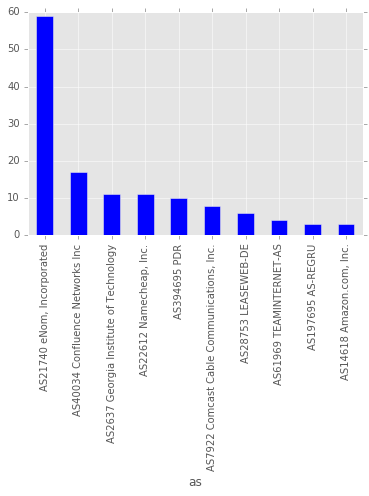

In [115]:
gb2 = df.groupby('as')['domain'].count().sort_values(ascending=False).head(10)
print gb2
gb2.plot.bar()